# **Problem Statement**
Measles is a highly contagious disease. Although an effective vaccine exists, outbreaks continue to occur in many countries. The World Health Organization dataset from 06-24-2025 compiles measles case data from different countries and regions. By analyzing temporal trends and geographical differences in measles cases, we can gain a clearer understanding of how the disease is distributed worldwide and provide a foundation for public health research.

# **Data Preference**
Dataset Link: [World Health Organization](https://immunizationdata.who.int/global?topic=Provisional-measles-and-rubella-data&lo%20cation=)

CSV File: [Global Measles Data](https://www.bing.com/ck/a?!&&p=da4b01556def30dc993d4c98509f3050a7a3c0d6292f5ac00dcd3373a6f5e725JmltdHM9MTc1NzM3NjAwMA&ptn=3&ver=2&hsh=4&fclid=055f8d0f-0193-6020-1937-9efe00086119&psq=404-table-web-epi-curve-data.xlsx&u=a1aHR0cHM6Ly9pbW11bml6YXRpb25kYXRhLndoby5pbnQvZG9jcy9saWJyYXJpZXNwcm92aWRlcjIxL21lYXNsZXMtYW5kLXJ1YmVsbGEvNDA0LXRhYmxlLXdlYi1lcGktY3VydmUtZGF0YS54bHN4P3NmdnJzbj01OTIyZWJmN182)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')


# **Dataset Documentation**
1. Country: Country or region name
2. Year / Month: Time of observation
3. measles_suspect: Suspected measles cases: A suspected case is one in which a
patient with fever and maculopapular (non-vesicular) rash, or in whom a health-
care worker suspects measles
4. measles_clinical: Clinically compatible measles cases: A suspected case with
fever and maculopapular (non-vesicular) rash and at least one of cough, coryza or
conjunctivitis, but no adequate clinical specimen was taken and the case has not
been linked epidemiologically to a laboratory-confirmed case of measles or other
communicable disease
5. measles_lab_confirmed: Laboratory-confirmed measles cases: A suspected case
of measles that has been confirmed positive by testing in a proficient laboratory,
and vaccine-associated illness has been ruled out
6. measles_total: Total measles cases: The sum of clinically compatible,
epidemiologically linked and laboratory-confirmed cases
7. Data has 23000+ records and 7 attributes.

In [ ]:
# data from Google Sheets
url = "https://docs.google.com/spreadsheets/d/1NDwpwpJ2arnsmbZdwJIIxIUnt4rxd8px257JhOSXc7c/export?format=csv" #test data

# data is stored in pandas as a DataFrame
df = pd.read_csv(url)
# the top of the data frame is the "head"
df.head()


,region,country,iso3,year,month,measles_suspect,measles_clinical,measles_epi_linked,measles_lab_confirmed,measles_total,rubella_clinical,rubella_epi_linked,rubella_lab_confirmed,rubella_total,discarded
0,AFR,Algeria,DZA,2012,1,8.0,6.0,0.0,2.0,8.0,NaN,NaN,NaN,NaN,0.0
1,AFR,Algeria,DZA,2012,2,10.0,10.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,0.0
2,AFR,Algeria,DZA,2012,3,17.0,17.0,0.0,0.0,17.0,NaN,NaN,NaN,NaN,0.0
3,AFR,Algeria,DZA,2012,4,7.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,2.0
4,AFR,Algeria,DZA,2012,5,14.0,11.0,0.0,0.0,11.0,0.0,0.0,3.0,3.0,3.0


# **Explanation**
This study aims to analyze the temporal changes and geographic distribution of measles cases worldwide to better understand overall trends. Specifically, it will:
1. Observe increases or decreases in measles cases over time across countries
2. Compare the scale of measles cases between countries to identify high-risk
regions.
3. Provide a global data perspective to help researchers and policymakers
understand the current situation of measles outbreaks, serving as a baseline for
future research and policy discussions.

# VISUALIZATION 1: Global Measles Trends Over Time by Region
Global Measles Trends Over Time by Region - Line plot showing how measles cases have evolved across WHO regions from 2012-2025

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024., 2026.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

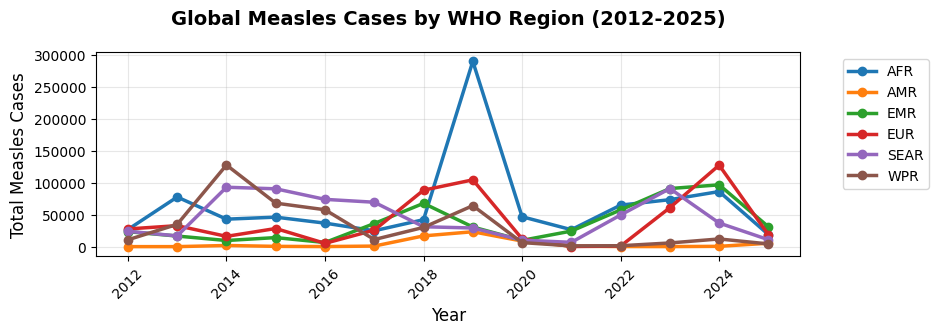

In [ ]:
# ==========================================
# VISUALIZATION 1: Global Measles Trends Over Time by Region
# ==========================================
plt.figure(figsize=(20, 9))
plt.subplot(3, 2, 1)

# Calculate annual totals by region
annual_measles = df.groupby(['year', 'region'])['measles_total'].sum().unstack(fill_value=0)

for region in annual_measles.columns:
    plt.plot(annual_measles.index, annual_measles[region],
             marker='o', linewidth=2.5, markersize=6, label=region)

plt.title('Global Measles Cases by WHO Region (2012-2025)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Measles Cases', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# VISUALIZATION 2: Laboratory Confirmation Rates Heatmap
Laboratory Confirmation Rates Heatmap - Shows the percentage of measles cases that were laboratory-confirmed by region and year

Text(345.72222222222223, 0.5, 'WHO Region')

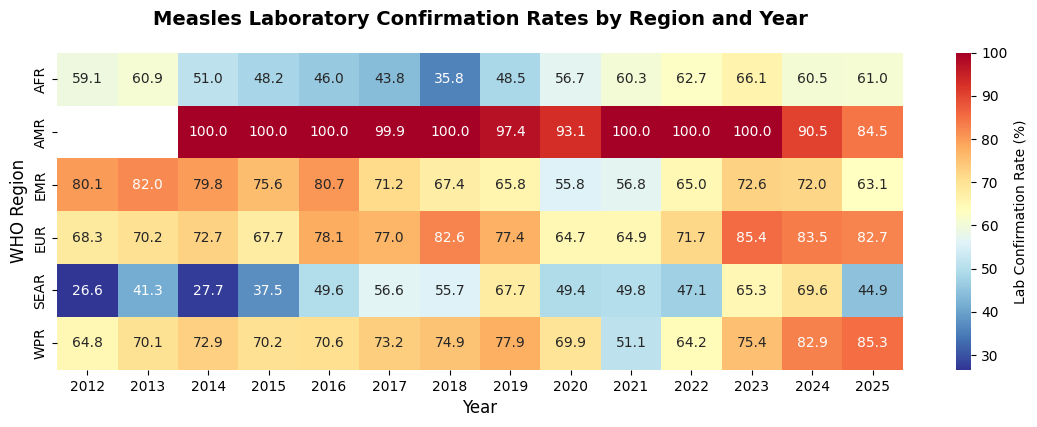

In [ ]:
# ==========================================
# VISUALIZATION 2: Laboratory Confirmation Rates Heatmap
# ==========================================
plt.figure(figsize=(30, 14))
plt.subplot(3, 2, 3)

# Calculate lab confirmation rates
df['measles_lab_confirmation_rate'] = np.where(df['measles_total'] > 0,
                                               df['measles_lab_confirmed'] / df['measles_total'] * 100,
                                               np.nan)

# Create pivot table for heatmap
confirmation_heatmap = df.groupby(['region', 'year'])['measles_lab_confirmation_rate'].mean().unstack()

sns.heatmap(confirmation_heatmap, annot=True, fmt='.1f', cmap='RdYlBu_r',
            cbar_kws={'label': 'Lab Confirmation Rate (%)'})
plt.title('Measles Laboratory Confirmation Rates by Region and Year', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)

# VISUALIZATION 3: Top 10 Countries by Total Measles Cases
Top 10 Countries by Total Measles Cases - Horizontal bar chart identifying the most affected countries

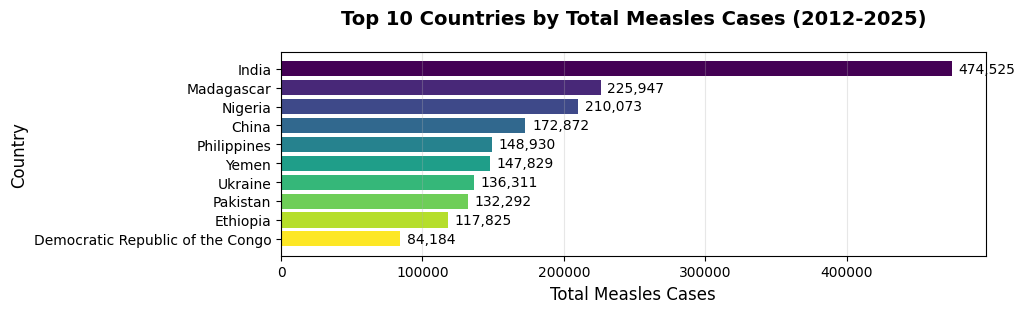

In [ ]:
# ==========================================
# VISUALIZATION 3: Top 10 Countries by Total Measles Cases
# ==========================================
plt.figure(figsize=(20, 9))
plt.subplot(3, 2, 4)

# Calculate total cases by country
country_totals = df.groupby('country')['measles_total'].sum().sort_values(ascending=False)
top_10_countries = country_totals.head(10)

bars = plt.barh(range(len(top_10_countries)), top_10_countries.values,
                color=plt.cm.viridis(np.linspace(0, 1, len(top_10_countries))))

plt.yticks(range(len(top_10_countries)), top_10_countries.index)
plt.title('Top 10 Countries by Total Measles Cases (2012-2025)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Total Measles Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(top_10_countries) * 0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# VISUALIZATION 4: Simple Rubella Cases Over Time
The rubella visualizations show global disease trends over time, regional distribution patterns, most affected countries, and laboratory confirmation rates to understand the epidemiological landscape of rubella surveillance data.


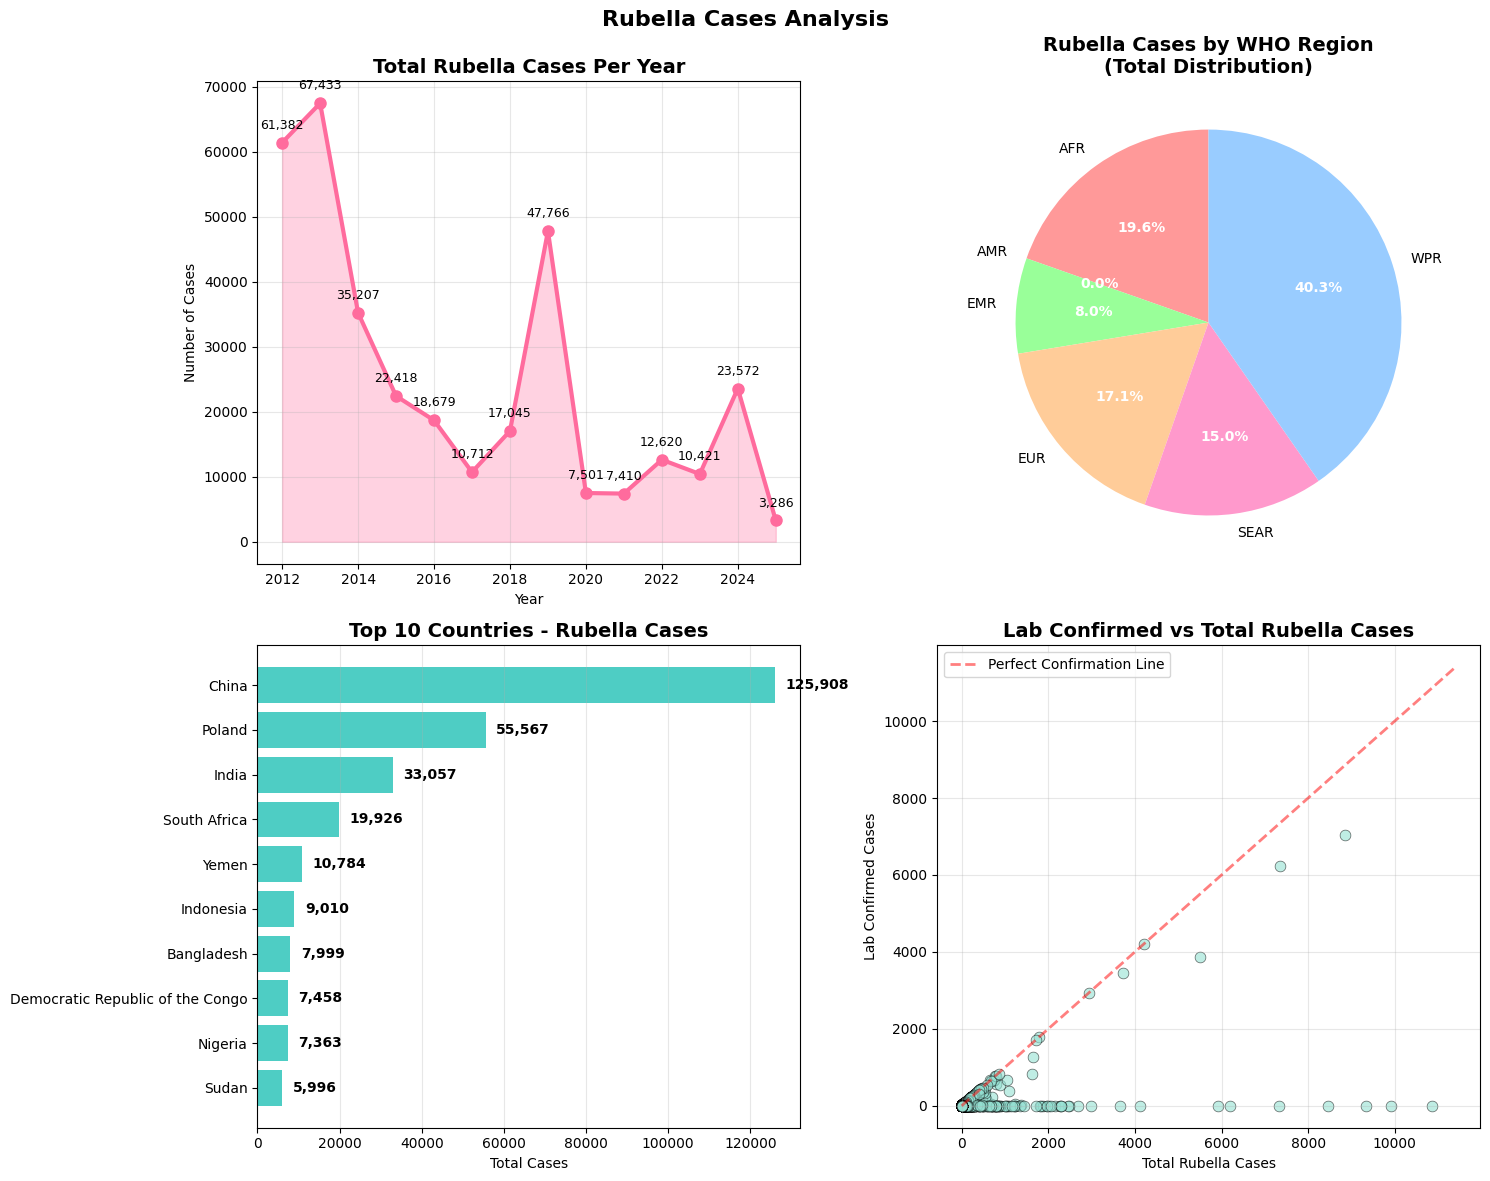

RUBELLA SUMMARY STATISTICS
📊 Total Rubella Cases: 345,452.0
🔬 Lab Confirmed Cases: 156,738.0
✅ Overall Confirmation Rate: 45.4%

🌍 Regional Breakdown:
   WPR: 139,302.0 cases (40.3%)
   AFR: 67,719.0 cases (19.6%)
   EUR: 58,906.0 cases (17.1%)
   SEAR: 51,936.0 cases (15.0%)
   EMR: 27,584.0 cases (8.0%)
   AMR: 5.0 cases (0.0%)

📅 Year with Most Cases:
   2013: 67,433.0 cases

🏆 Top 3 Most Affected Countries:
   1. China: 125,908.0 cases
   2. Poland: 55,567.0 cases
   3. India: 33,057.0 cases


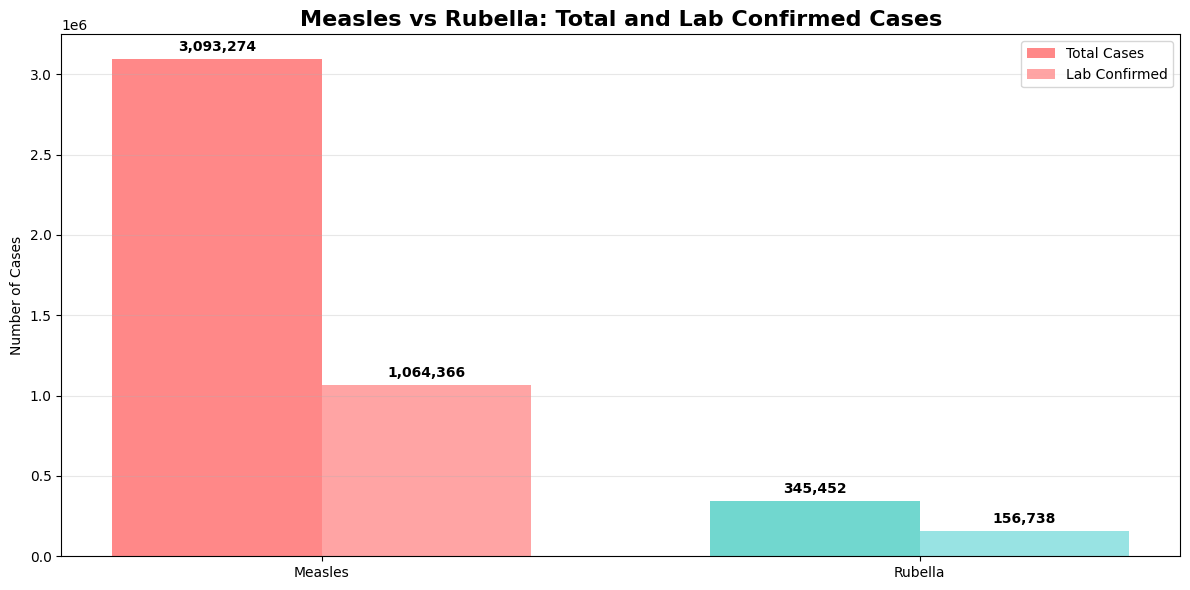

In [ ]:
# Set up nice styling
plt.style.use('default')
sns.set_palette("Set2")


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Rubella Cases Analysis', fontsize=16, fontweight='bold')

# ==========================================
# 1 Simple Rubella Cases Over Time
# ==========================================
ax1 = axes[0, 0]

# Get total rubella cases by year
yearly_rubella = df.groupby('year')['rubella_total'].sum()

# Create a simple line plot with markers
ax1.plot(yearly_rubella.index, yearly_rubella.values,
         marker='o', linewidth=3, markersize=8, color='#FF6B9D')
ax1.fill_between(yearly_rubella.index, yearly_rubella.values, alpha=0.3, color='#FF6B9D')

ax1.set_title('Total Rubella Cases Per Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Cases')
ax1.grid(True, alpha=0.3)

# Add value labels on points
for x, y in zip(yearly_rubella.index, yearly_rubella.values):
    if y > 0:  # Only label non-zero values
        ax1.annotate(f'{int(y):,}', (x, y), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9)

# ==========================================
# 2 Rubella Cases by WHO Region (Pie Chart)
# ==========================================
ax2 = axes[0, 1]

# Get total cases by region
region_rubella = df.groupby('region')['rubella_total'].sum()
region_rubella = region_rubella[region_rubella > 0]  # Only include regions with cases

# Create a colorful pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
wedges, texts, autotexts = ax2.pie(region_rubella.values, labels=region_rubella.index,
                                   autopct='%1.1f%%', startangle=90, colors=colors)

ax2.set_title('Rubella Cases by WHO Region\n(Total Distribution)', fontsize=14, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# ==========================================
# 3 Top 10 Countries with Most Rubella Cases
# ==========================================
ax3 = axes[1, 0]

# Get top 10 countries by rubella cases
country_rubella = df.groupby('country')['rubella_total'].sum().sort_values(ascending=False)
top_10 = country_rubella.head(10)

# Create horizontal bar chart
bars = ax3.barh(range(len(top_10)), top_10.values, color='#4ECDC4')

# Customize the chart
ax3.set_yticks(range(len(top_10)))
ax3.set_yticklabels(top_10.index)
ax3.set_title('Top 10 Countries - Rubella Cases', fontsize=14, fontweight='bold')
ax3.set_xlabel('Total Cases')

# Add value labels on bars
for i, (country, value) in enumerate(top_10.items()):
    ax3.text(value + max(top_10) * 0.02, i, f'{int(value):,}',
             va='center', fontweight='bold')

ax3.grid(axis='x', alpha=0.3)
ax3.invert_yaxis()

# ==========================================
# 4 Rubella Lab Confirmation vs Total Cases
# ==========================================
ax4 = axes[1, 1]

# Filter data for countries with rubella cases
rubella_data = df[(df['rubella_total'] > 0) & (df['rubella_lab_confirmed'] >= 0)]

# Create scatter plot
scatter = ax4.scatter(rubella_data['rubella_total'],
                     rubella_data['rubella_lab_confirmed'],
                     alpha=0.6, s=60, c='#95E1D3', edgecolors='black', linewidth=0.5)

ax4.set_title('Lab Confirmed vs Total Rubella Cases', fontsize=14, fontweight='bold')
ax4.set_xlabel('Total Rubella Cases')
ax4.set_ylabel('Lab Confirmed Cases')
ax4.grid(True, alpha=0.3)

# Add diagonal reference line (perfect confirmation)
max_val = max(ax4.get_xlim()[1], ax4.get_ylim()[1])
ax4.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=2,
         label='Perfect Confirmation Line')
ax4.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# ==========================================
# SIMPLE RUBELLA STATISTICS
# ==========================================
print("=" * 50)
print("RUBELLA SUMMARY STATISTICS")
print("=" * 50)

total_rubella = df['rubella_total'].sum()
total_confirmed = df['rubella_lab_confirmed'].sum()
confirmation_rate = (total_confirmed / total_rubella * 100) if total_rubella > 0 else 0

print(f"📊 Total Rubella Cases: {total_rubella:,}")
print(f"🔬 Lab Confirmed Cases: {total_confirmed:,}")
print(f"✅ Overall Confirmation Rate: {confirmation_rate:.1f}%")

print(f"\n🌍 Regional Breakdown:")
region_stats = df.groupby('region')['rubella_total'].sum().sort_values(ascending=False)
for region, cases in region_stats.items():
    if cases > 0:
        percentage = (cases / total_rubella * 100)
        print(f"   {region}: {cases:,} cases ({percentage:.1f}%)")

print(f"\n📅 Year with Most Cases:")
yearly_cases = df.groupby('year')['rubella_total'].sum()
peak_year = yearly_cases.idxmax()
peak_cases = yearly_cases.max()
print(f"   {peak_year}: {peak_cases:,} cases")

print(f"\n🏆 Top 3 Most Affected Countries:")
top_countries = df.groupby('country')['rubella_total'].sum().sort_values(ascending=False).head(3)
for i, (country, cases) in enumerate(top_countries.items(), 1):
    if cases > 0:
        print(f"   {i}. {country}: {cases:,} cases")

# ==========================================
# BONUS: Simple Summary Chart
# ==========================================
plt.figure(figsize=(12, 6))

# Create side-by-side comparison of measles vs rubella
diseases = ['Measles', 'Rubella']
total_cases = [df['measles_total'].sum(), df['rubella_total'].sum()]
confirmed_cases = [df['measles_lab_confirmed'].sum(), df['rubella_lab_confirmed'].sum()]

x = np.arange(len(diseases))
width = 0.35

bars1 = plt.bar(x - width/2, total_cases, width, label='Total Cases',
                color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
bars2 = plt.bar(x + width/2, confirmed_cases, width, label='Lab Confirmed',
                color=['#FF8E8E', '#7FDDDD'], alpha=0.8)

plt.title('Measles vs Rubella: Total and Lab Confirmed Cases', fontsize=16, fontweight='bold')
plt.ylabel('Number of Cases')
plt.xticks(x, diseases)
plt.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(total_cases) * 0.01,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()